In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aibiz-2021-spring-task-3/fashion-mnist_test_sample_submission.csv
/kaggle/input/aibiz-2021-spring-task-3/fashion-mnist_test.csv/fashion-mnist_test.csv
/kaggle/input/aibiz-2021-spring-task-3/fashion-mnist_train.csv/fashion-mnist_train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/aibiz-2021-spring-task-3/fashion-mnist_train.csv/fashion-mnist_train.csv')
test = pd.read_csv('/kaggle/input/aibiz-2021-spring-task-3/fashion-mnist_test.csv/fashion-mnist_test.csv')
submission = pd.read_csv('/kaggle/input/aibiz-2021-spring-task-3/fashion-mnist_test_sample_submission.csv')

In [248]:
train.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [4]:
x = train.iloc[:,1:]
y = train.iloc[:,:1]

In [180]:
x.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0


In [181]:
y.head(3)

,label
0,2
1,9
2,6


In [182]:
print(x.shape , 'dimension' , x.ndim)
print(y.shape ,  'dimension' , y.ndim)

(60000, 784) dimension 2
(60000, 1) dimension 2


In [5]:
y = y.to_numpy()

In [184]:
print(y)
print(y.shape ,  'dimension' , y.ndim)

[[2]
 [9]
 [6]
 ...
 [8]
 [8]
 [7]]
(60000, 1) dimension 2


In [6]:
y = y.ravel()
print(y)
print(y.shape ,  'dimension' , y.ndim)

[2 9 6 ... 8 8 7]
(60000,) dimension 1


In [7]:
print(len(y) , 'some data' , y[0:20]) ### y is  now ready

60000 some data [2 9 6 0 3 4 4 5 4 8 0 8 9 0 2 2 9 3 3 3]


In [187]:
x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
x = x.to_numpy()
print(x.shape , 'dimension' , x.ndim)

(60000, 784) dimension 2


In [189]:
x  ## converted this to 2d

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
x = x.reshape(-1, 28, 28, 1)   ### for cnn we should reshape it
print(x.shape , 'dimension' , x.ndim)

(60000, 28, 28, 1) dimension 4


In [306]:
# x[0:1]

In [192]:
x.shape

(60000, 28, 28, 1)

## Normalizaing Image pixel value and Visualization

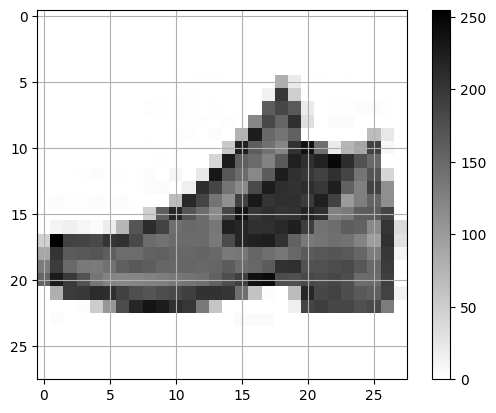

In [193]:
plt.figure()
plt.imshow(x[1] , cmap = plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.show()

In [10]:
x = x/255.0

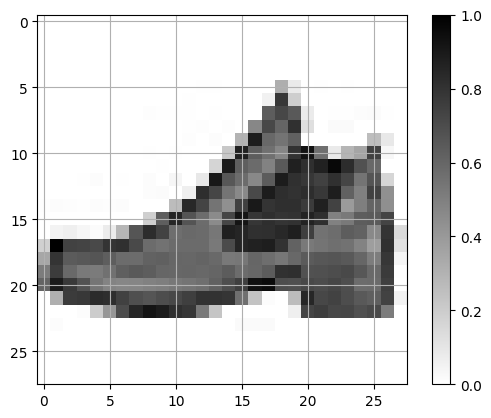

In [195]:
plt.figure()
plt.imshow(x[1] , cmap = plt.cm.binary)
plt.colorbar()
plt.grid(True)
plt.show()

### Train Test Split

In [11]:
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(42000, 28, 28, 1)
(42000,)
(18000, 28, 28, 1)
(18000,)


# Model Building

## CNN MODEL

### LeNet - 5 --> Original

In [15]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten ,AveragePooling2D

import tensorflow as tf
from tensorflow.keras import layers, models

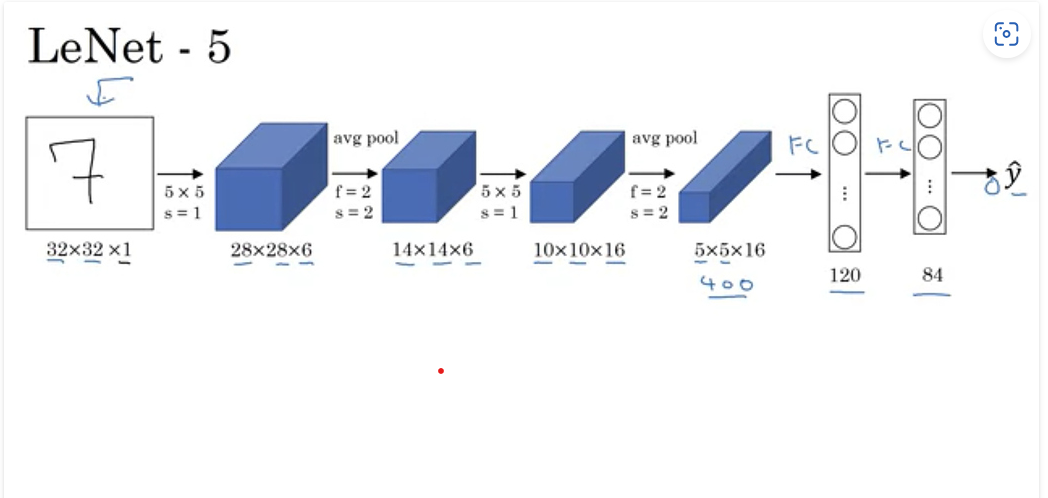


In [17]:
from keras import backend as K

# Clear the Keras session
K.clear_session()

In [228]:
    model = Sequential()

    # Layer 1: Convolutional Layer
    model.add(Conv2D(6, kernel_size=(5, 5),  padding='valid' , activation='tanh',  strides =1 ,  input_shape=(28,28,1)))
    model.add(AveragePooling2D(pool_size=(2, 2) , strides = 2 , padding = 'valid' ))

    # Layer 2: Convolutional Layer
    model.add(Conv2D(16, kernel_size=(5, 5),padding='valid' , activation='tanh' ,strides =1))
    model.add(AveragePooling2D(pool_size=(2, 2) , padding= 'valid' , strides= 2))

    # Flattening the output from the convolutional layers
    model.add(Flatten())

    # Layer 4: Fully Connected Layer
    model.add(Dense(120, activation = 'tanh'))
    model.add(Dense(84, activation = 'tanh'))

    # Layer 5: Output Layer
    model.add(Dense(10, activation='softmax')) 

In [229]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

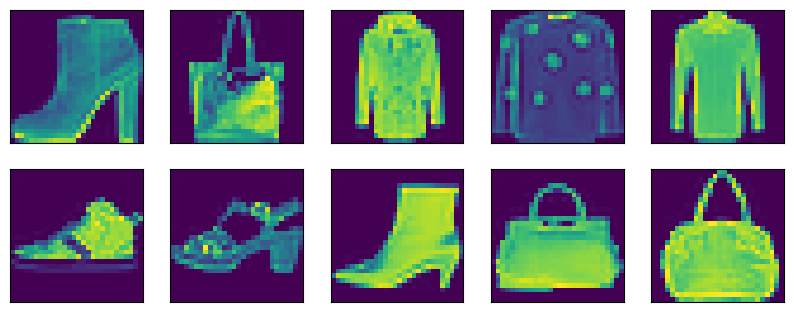

In [230]:
plt.figure(figsize=(10,10))

for i in range(10):
  plt.subplot(5,5 , i +1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
plt.show()

In [231]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [232]:
history = model.fit(train_images,train_labels , validation_data = (test_images , test_labels) , epochs = 50 ,batch_size=128 ,verbose =1 )

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6351 - loss: 1.0026 - val_accuracy: 0.7988 - val_loss: 0.5385
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8113 - loss: 0.5112 - val_accuracy: 0.8202 - val_loss: 0.4819
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8319 - loss: 0.4592 - val_accuracy: 0.8413 - val_loss: 0.4273
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8471 - loss: 0.4169 - val_accuracy: 0.8491 - val_loss: 0.4140
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8602 - loss: 0.3848 - val_accuracy: 0.8607 - val_loss: 0.3821
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8694 - loss: 0.3588 - val_accuracy: 0.8692 - val_loss: 0.3621
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8709 - loss: 0.3491 - val_accuracy: 0.8727 - val_loss: 0.3509
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8790 - loss: 0.3332 - val_accuracy: 0

### Model is not good because there is so much variance in loss of train and test value. --> Overfitting problem
### Also, the accuracy difference between train and test is between 8-10 %

In [233]:
# Check accuracy
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss


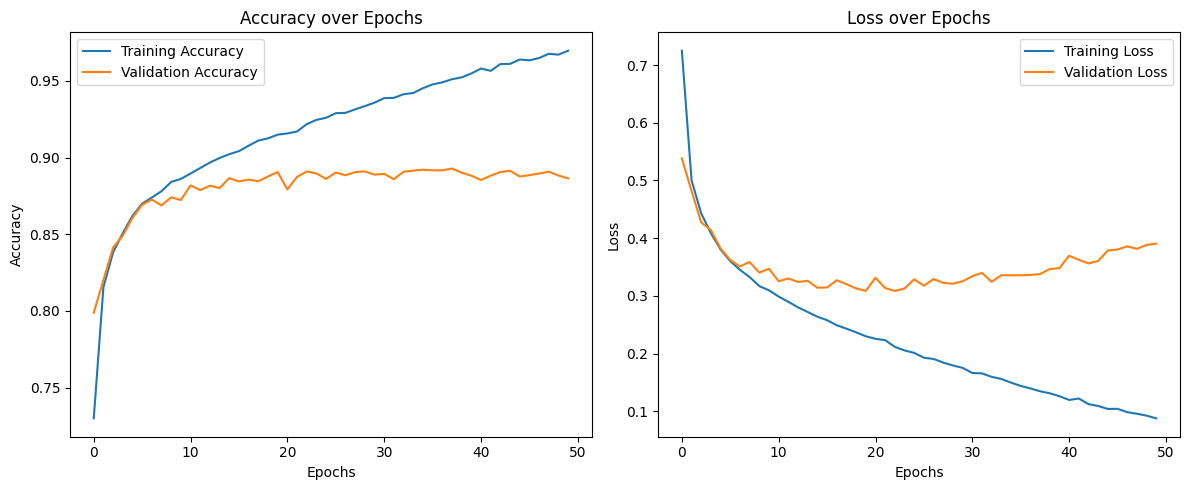

In [234]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### LeNet - 5 --> custom

In [236]:
from keras import backend as K

# Clear the Keras session
K.clear_session()

#### CHANGES: --> activation function : relu

In [237]:
    model = Sequential()

    # Layer 1: Convolutional Layer
    model.add(Conv2D(6, kernel_size=(5, 5),  padding='valid' , activation='relu',  strides =1 ,  input_shape=(28,28,1)))
    model.add(AveragePooling2D(pool_size=(2, 2) , strides = 2 , padding = 'valid' ))

    # Layer 2: Convolutional Layer
    model.add(Conv2D(16, kernel_size=(5, 5),padding='valid' , activation='relu' ,strides =1))
    model.add(AveragePooling2D(pool_size=(2, 2) , padding= 'valid' , strides= 2))

    # Flattening the output from the convolutional layers
    model.add(Flatten())

    # Layer 4: Fully Connected Layer
    model.add(Dense(120, activation = 'relu'))
    model.add(Dense(84, activation = 'relu'))

    # Layer 5: Output Layer
    model.add(Dense(10, activation='softmax'))
    model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [238]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [239]:
history = model.fit(train_images,train_labels , validation_data = (test_images , test_labels) , epochs = 50 ,batch_size=128 ,verbose =1 )

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.5981 - loss: 1.1436 - val_accuracy: 0.7707 - val_loss: 0.5789
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7840 - loss: 0.5629 - val_accuracy: 0.8072 - val_loss: 0.5305
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8142 - loss: 0.4977 - val_accuracy: 0.8329 - val_loss: 0.4570
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8393 - loss: 0.4414 - val_accuracy: 0.8513 - val_loss: 0.4141
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8546 - loss: 0.4040 - val_accuracy: 0.8493 - val_loss: 0.4102
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8592 - loss: 0.3817 - val_accuracy: 0.8494 - val_loss: 0.4097
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.3698 - val_accuracy: 0.8749 - val_loss: 0.3547
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8740 - loss: 0.3399 - val_accuracy: 0

In [240]:
# Check accuracy
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss


In [ ]:
print('train_accuracy' , max(train_accuracy))
print('val_accuracy' , max(val_accuracy))
print('train_loss' , min(train_loss))
print('val_loss' , min(val_loss))

In [ ]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### CHANGES: --> activation function : relu and padding = same

In [259]:
    model = Sequential()

    # Layer 1: Convolutional Layer
    model.add(Conv2D(6, kernel_size=(5, 5),  padding='same' , activation='relu',  strides =1 ,  input_shape=(28,28,1)))
    model.add(AveragePooling2D(pool_size=(2, 2) , strides = 2 , padding = 'valid' ))

    # Layer 2: Convolutional Layer
    model.add(Conv2D(16, kernel_size=(5, 5),padding='same' , activation='relu' ,strides =1))
    model.add(AveragePooling2D(pool_size=(2, 2) , padding= 'same' , strides= 2))

    # Flattening the output from the convolutional layers
    model.add(Flatten())

    # Layer 4: Fully Connected Layer
    model.add(Dense(120, activation = 'relu'))
    model.add(Dense(84, activation = 'relu'))

    # Layer 5: Output Layer
    model.add(Dense(10, activation='softmax'))
    model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 7, 7, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        94,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,786 (421.04 KB)

 Trainable params: 107,786 (421.04 KB)

 Non-trainable params: 0 (0.00 B)

In [260]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(train_images,train_labels , validation_data = (test_images , test_labels) , epochs = 50 ,batch_size=128 ,verbose =1 )

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.6572 - loss: 1.0090 - val_accuracy: 0.8037 - val_loss: 0.5327
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8176 - loss: 0.4928 - val_accuracy: 0.8356 - val_loss: 0.4434
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8478 - loss: 0.4180 - val_accuracy: 0.8510 - val_loss: 0.4047
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8663 - loss: 0.3789 - val_accuracy: 0.8644 - val_loss: 0.3725
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8691 - loss: 0.3551 - val_accuracy: 0.8768 - val_loss: 0.3450
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8835 - loss: 0.3227 - val_accuracy: 0.8764 - val_loss: 0.3405
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8865 - loss: 0.3102 - val_accuracy: 0.8848 - val_loss: 0.3219
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8938 - loss: 0.2919 - val_accuracy: 0

In [261]:
# Check accuracy
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

print('train_accuracy' , max(train_accuracy))
print('val_accuracy' , max(val_accuracy))
print('train_loss' , min(train_loss))
print('val_loss' , min(val_loss))

train_accuracy 0.9830238223075867
val_accuracy 0.9103333353996277
train_loss 0.048274602741003036
val_loss 0.26229026913642883


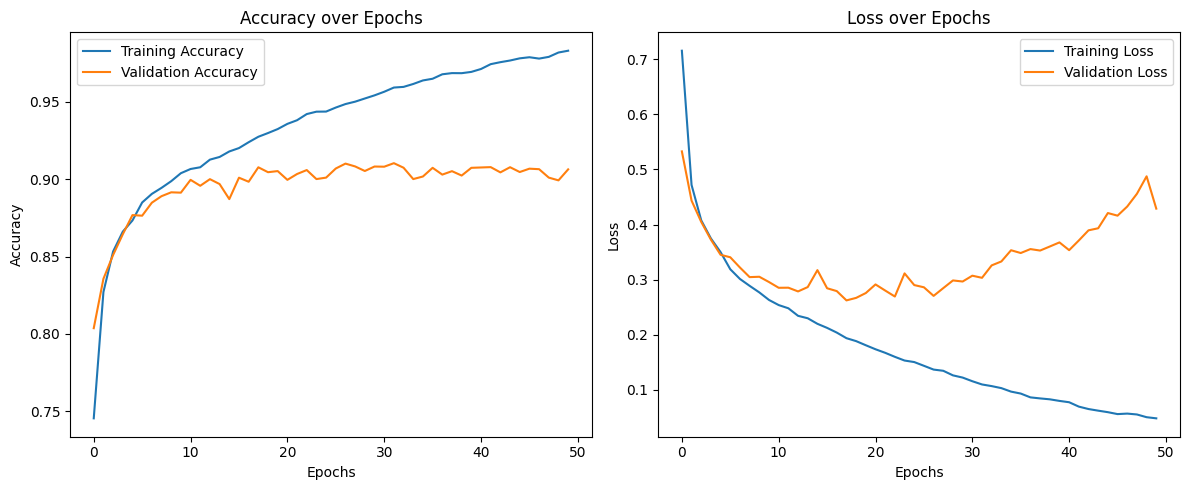

In [262]:
import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


#### CHANGES: --> activation function : relu , padding = same , more layers added 

In [327]:
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten,BatchNormalization

In [328]:
model = Sequential()

# Layer 1: Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5),  padding='same' , activation='relu',  strides =1 ,  input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2, 2) , strides = 2 , padding = 'valid' ))

# Layer 2: Convolutional Layer
model.add(Conv2D(32, kernel_size=(5, 5),padding='same' , activation='relu' ,strides =1))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2) , padding= 'same' , strides= 2))

# Layer 3: Convolutional Layer
model.add(Conv2D(64, kernel_size=(5, 5),padding='same' , activation='relu' ,strides =1))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2) , padding= 'same' , strides= 2))


# Flattening the output from the convolutional layers
model.add(Flatten())

# Layer 4: Fully Connected Layer
model.add(Dense(120, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(84, activation = 'relu'))
model.add(Dropout(0.3))

# Layer 5: Output Layer
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics = ['accuracy'])
history = model.fit(train_images,train_labels , validation_data = (test_images , test_labels) , epochs = 50 ,batch_size=128 ,verbose =1 )

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.6936 - loss: 0.8719 - val_accuracy: 0.1026 - val_loss: 2.8035
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8559 - loss: 0.4038 - val_accuracy: 0.8479 - val_loss: 0.3967
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8789 - loss: 0.3373 - val_accuracy: 0.8929 - val_loss: 0.2939
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8951 - loss: 0.2914 - val_accuracy: 0.8955 - val_loss: 0.2834
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9044 - loss: 0.2632 - val_accuracy: 0.8963 - val_loss: 0.2933
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9149 - loss: 0.2392 - val_accuracy: 0.8957 - val_loss: 0.2806
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9187 - loss: 0.2213 - val_accuracy: 0.9107 - val_loss: 0.2610
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9255 - loss: 0.2012 - val_accuracy: 

train_accuracy 0.9897857308387756
val_accuracy 0.8971666693687439
train_loss 0.028577400371432304
val_loss 0.3103199303150177


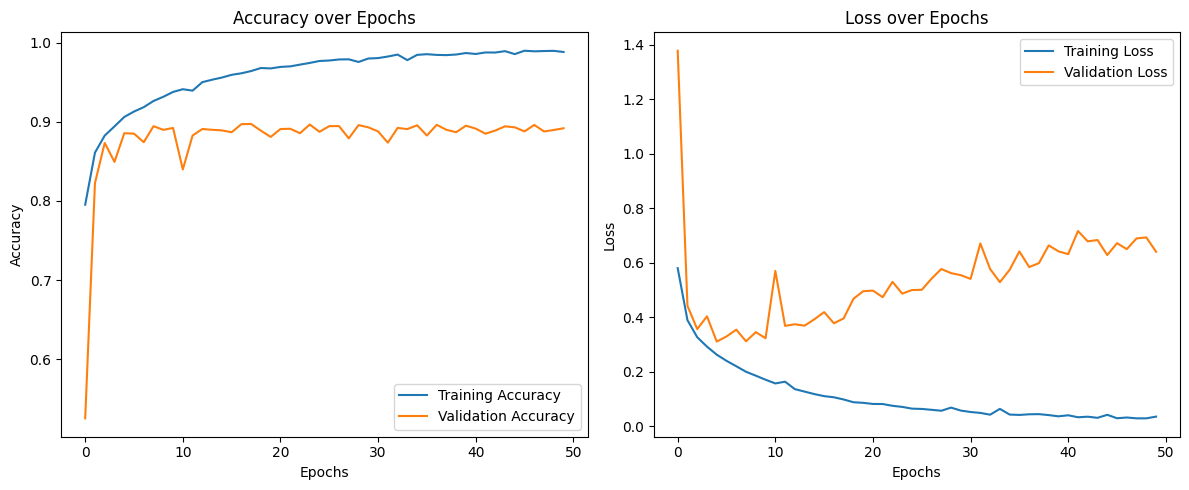

In [21]:
# Check accuracy
train_accuracy = history.history['accuracy']  # Training accuracy
val_accuracy = history.history['val_accuracy']  # Validation accuracy
train_loss = history.history['loss']  # Training loss
val_loss = history.history['val_loss']  # Validation loss

print('train_accuracy' , max(train_accuracy))
print('val_accuracy' , max(val_accuracy))
print('train_loss' , min(train_loss))
print('val_loss' , min(val_loss))


import matplotlib.pyplot as plt

# Plotting Accuracy
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## KERAS TUNER

In [30]:
import keras_tuner
import keras

In [31]:
from tensorflow import keras

def build_model(hp):
    model = keras.Sequential()
    
    # Hyperparameter for the number of filters in Conv2D
    model.add(keras.layers.Conv2D(
        filters=hp.Choice('filters', [16, 32, 64]),  # Number of filters
        kernel_size=(3, 3),  # Kernel size
        padding=hp.Choice('padding', ['same', 'valid']),  # Padding choice
        activation='relu',
        input_shape=(28, 28, 1)  # Input shape for grayscale images
    ))
    
    # Batch normalization
    model.add(keras.layers.BatchNormalization())
    
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer
    
    # Dropout layer
    model.add(keras.layers.Dropout(hp.Float('dropout_rate', 0.4, 0.6, step=0.1)))  # Dropout rate choice

    # Flatten the output from Conv2D
    model.add(keras.layers.Flatten())
    
    # Hyperparameter for units in Dense layer
    model.add(keras.layers.Dense(
        units=hp.Choice('units', [8, 16, 32]),  # Number of units
        activation='relu'
    ))
    
    # Another dropout layer before the output layer
    model.add(keras.layers.Dropout(hp.Float('dropout_rate_2', 0.2, 0.5, step=0.1)))

    model.add(keras.layers.Dense(10, activation='softmax'))  # Output layer
    
    # Compile the model
    model.compile(
        optimizer='adam', 
        loss='sparse_categorical_crossentropy',  # Loss function
        metrics=['accuracy']  # Metric to monitor
    )
    
    return model


In [33]:
from kerastuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir2',
    project_name='helloworld'
)

tuner.search(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))


Trial 5 Complete [00h 02m 44s]
val_loss: 0.2881310184796651

Best val_loss So Far: 0.26388463377952576
Total elapsed time: 00h 13m 59s


In [34]:
best_model = tuner.get_best_models(num_models=1)[0]

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [35]:
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9060 - loss: 0.2586
Test Loss: 0.259670615196228, Test Accuracy: 0.9066666960716248


# SUBMISSION PART

In [36]:
test = pd.read_csv('/kaggle/input/aibiz-2021-spring-task-3/fashion-mnist_test.csv/fashion-mnist_test.csv')
submission = pd.read_csv('/kaggle/input/aibiz-2021-spring-task-3/fashion-mnist_test_sample_submission.csv')

In [37]:
test.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0


In [38]:
test = test.to_numpy()
test = test.reshape(-1, 28, 28, 1)

In [39]:
test = test/255.0

In [40]:
test_predict = best_model.predict(test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [41]:
test_predict[0]

array([9.8756927e-01, 7.9668154e-11, 6.7600951e-08, 1.2522002e-05,
       2.8977849e-09, 3.9823489e-19, 1.2418107e-02, 3.8148083e-29,
       4.4770989e-08, 3.4752547e-27], dtype=float32)

In [42]:
predicted_classes = np.argmax(test_predict, axis=1)

In [43]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [44]:
submission.head()

,imageID,label
0,0,2
1,1,1
2,2,9
3,3,1
4,4,6


In [45]:
submission.shape

(10000, 2)

In [46]:
submission['label'] = -1

In [47]:
submission.head()

,imageID,label
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1


In [48]:
for i in range(len(submission)):
    submission.loc[i , 'label'] = predicted_classes[i]

In [49]:
submission.head()

,imageID,label
0,0,0
1,1,1
2,2,2
3,3,2
4,4,3


In [50]:
submission.to_csv('submission_hyperpramater.csv', index=False)  # 'index=False' prevents saving the index column